# Loan Application Exploratory Data Analysis

This notebook will explore the [loan application data set](https://www.kaggle.com/datasets/mishra5001/credit-card) found on Kaggle. I'll reference what the columns mean when writing interpretations. There are a lot of columns, though, so it doesn't make sense to translate them all here. A data dictionary can be found with the data set on Kaggle. 

I'll be doing some general data cleaning here, but I'll leave the specific cleaning that might depend on the type of model for each of those notebooks. 

In [1]:
import pandas as pd
# janitor is a lesser known package but is extremely useful when wanting to 
# easily chain methods for clean data transformation
import janitor
# plotly is great for EDA because you can manipulate the plot to get a better
# view of things
import plotly.express as px 

app = pd.read_csv('../data/application_data.csv')

In [2]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# get a summary of the data frame for examination
app_stats = app.describe().T

## Missingness Check

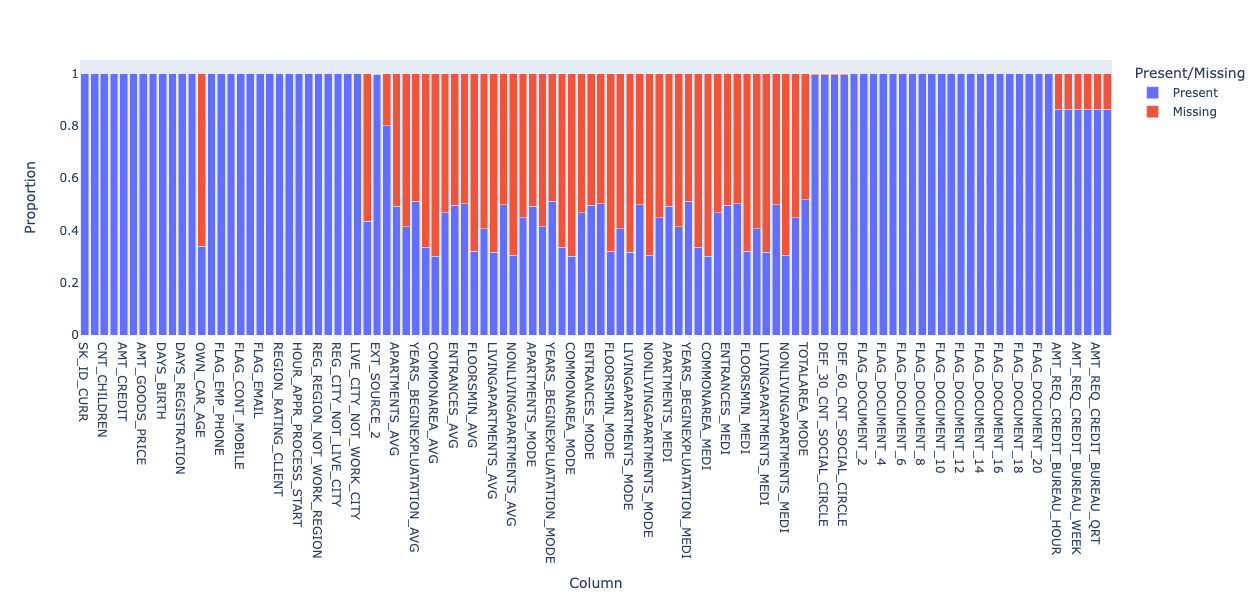

In [57]:
plot_data = (
    app_stats
    .reset_index()
    .rename_columns({'index': 'column_name',
                     'count': 'present_count'})
    .select_columns(['column_name', 'present_count'])
    .assign(missing_count=lambda x: app.shape[0] - x.present_count,
            Missing=lambda x: x.missing_count / app.shape[0],
            Present=lambda x: x.present_count / app.shape[0])
    .select_columns(['column_name', 'Present', 'Missing'])
    .melt(id_vars='column_name')
)

px.bar(
    plot_data, 
    x='column_name', 
    y='value',
    color='variable', 
    barmode='stack',
    labels={
        'variable': 'Present/Missing',
        'value': 'Proportion',
        'column_name': 'Column'},
    width=1200,
    height=600
)

Looks like the majority of the columns that have missing values have to do with features related to a property.